In [1]:
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages

base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('POT') #installing POT package

rpy2.rinterface.NULL

In [2]:
import pandas as pd #importing pandas

from thresholdmodeling import thresh_modeling #importing package

In [3]:
import os
import numpy as np

In [4]:
path='E:\program'
os.chdir(path)

In [14]:
inputFolder=r'CMIP\rainfall_data_total'
subbassins=52
model=[[] for _ in range(subbassins)]
for j in range(0,21): #2040-2060 (25,45)
    file=os.listdir(inputFolder)[j]
    for i in np.arange(0,subbassins): #(subbassins)
        file_path1=os.path.join(inputFolder, file)
        df1 = pd.read_csv(file_path1,index_col='name')
        model[i].append(df1.iloc[i,:].values.tolist())
    
flat_list=[[] for _ in range(subbassins)]
for i in range(subbassins):
    flat_list[i] = [item for sublist in model[i] for item in sublist]

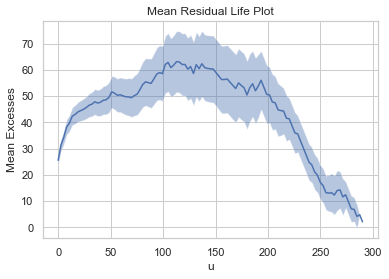

C:\Users\Quint\anaconda3\envs\gds\lib\site-packages\thresholdmodeling\thresh_modeling.py:111: RuntimeWarning: invalid value encountered in double_scalars
  CI_mod_scale.append((Var_mod_scale**0.5)*z) #getting the confidence interval for the


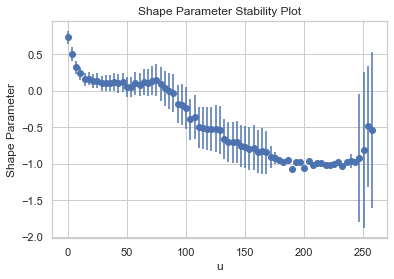

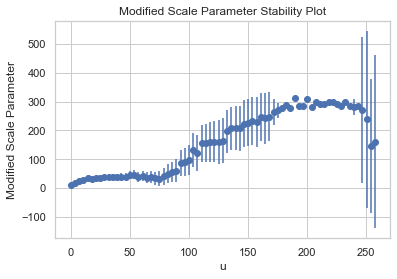

In [16]:
thresh_modeling.MRL(flat_list[0], 0.05)   
thresh_modeling.Parameter_Stability_plot(flat_list[0], 0.05)

In [5]:
from io import StringIO 
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [19]:
def pareto_distribution_ev(inputFolder):
    subbassins=52
    model=[[] for _ in range(subbassins)]
    for j in range(0,21): #2040-2060 (25,45)
        file=os.listdir(inputFolder)[j]
        for i in np.arange(0,subbassins): #(subbassins)
            file_path1=os.path.join(inputFolder, file)
            df1 = pd.read_csv(file_path1,index_col='name')
            model[i].append(df1.iloc[i,:].values.tolist())
    
    flat_list=[[] for _ in range(subbassins)]
    for i in range(subbassins):
        flat_list[i] = [item for sublist in model[i] for item in sublist]
    
    df_200_return_period=pd.DataFrame()
    df_200_return_period.index=df1.index
    df_200_return_period["100-year return level [2001-2021]"]=''
    for i in range(subbassins):
        data=flat_list[i]
        with Capturing() as output:
            thresh_modeling.return_value(data, 70, 0.05, 365, 36500, 'mle') #70 voor imerg, 120 voor others
        captured_output=output[0].split("is ")
        returnlevel=captured_output[1]
        df_200_return_period.iloc[i,0]=returnlevel
    return df_200_return_period


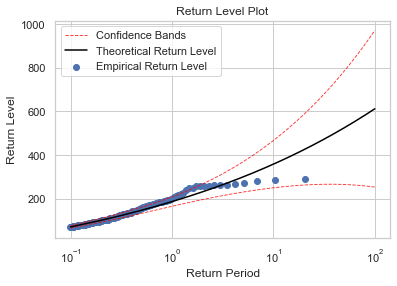

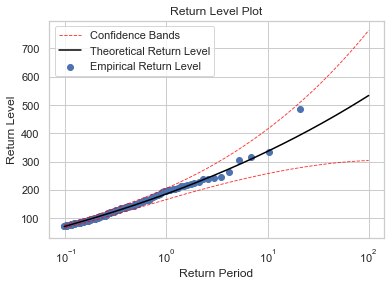

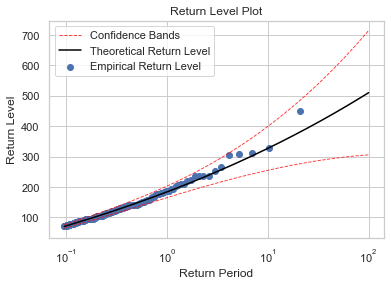

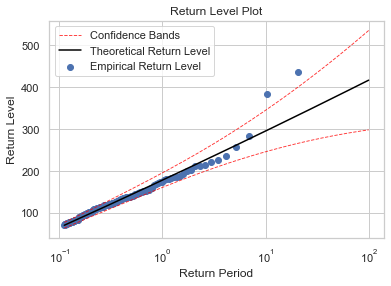

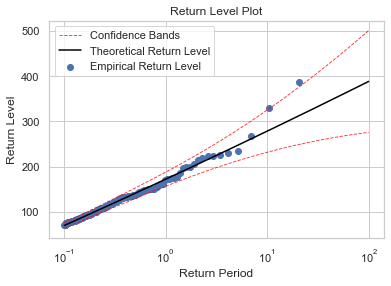

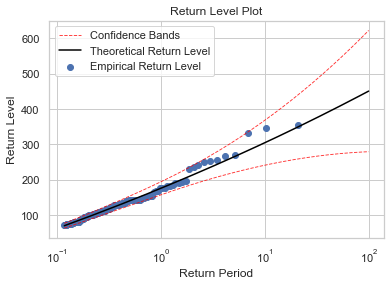

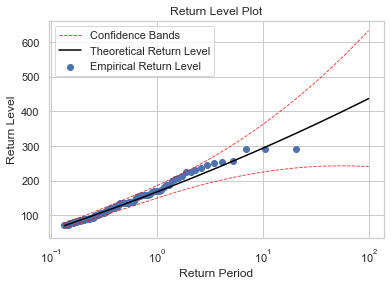

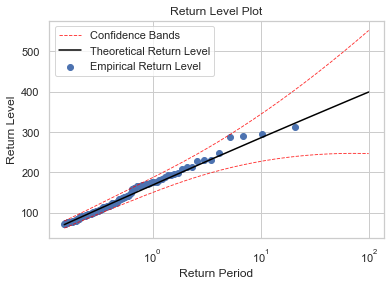

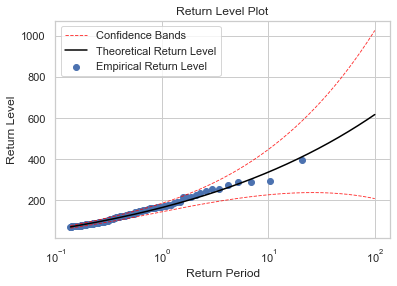

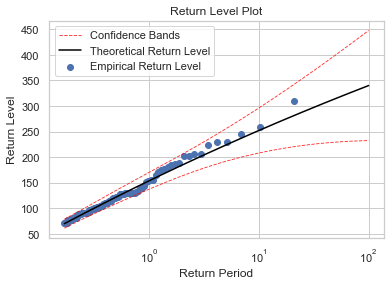

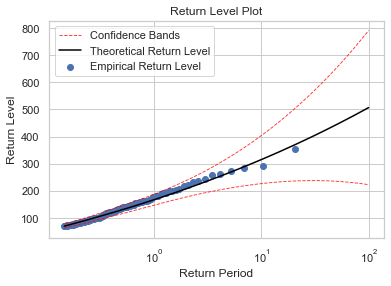

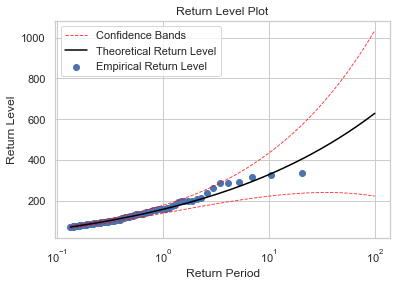

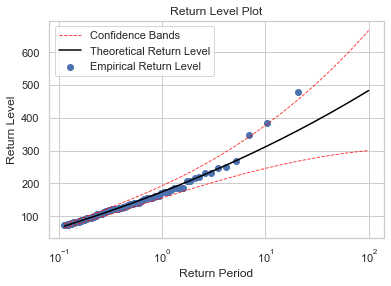

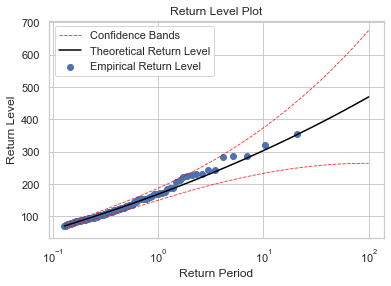

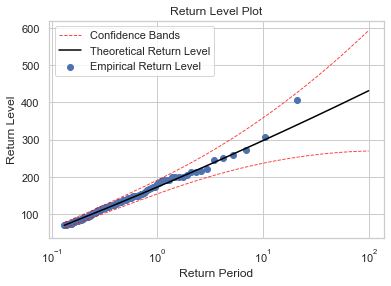

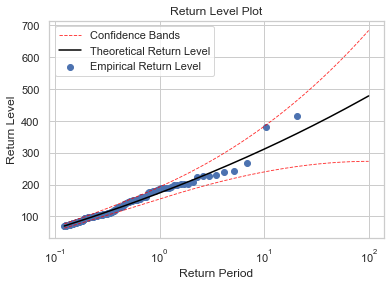

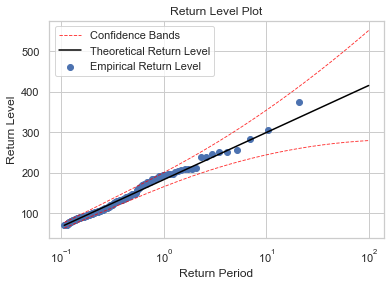

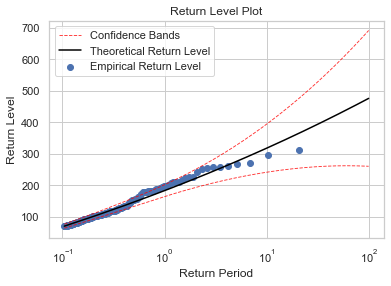

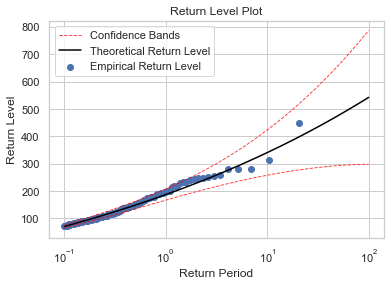

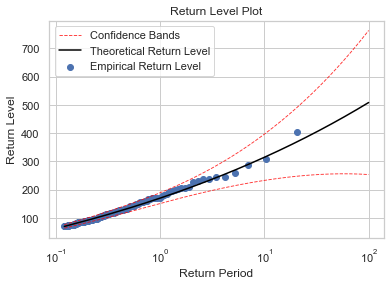

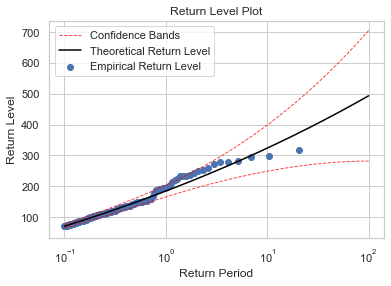

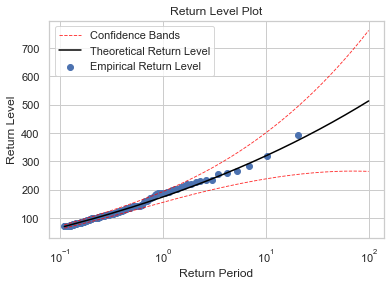

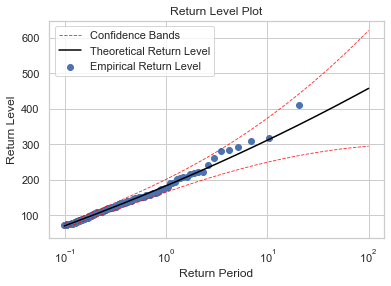

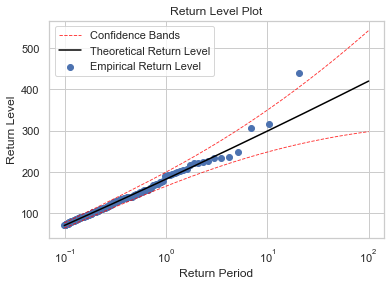

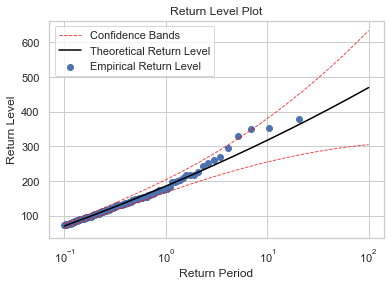

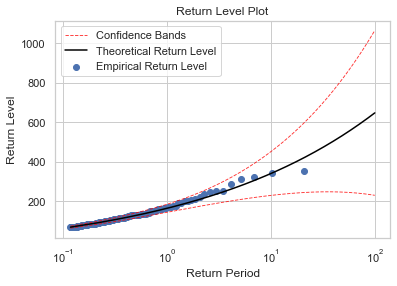

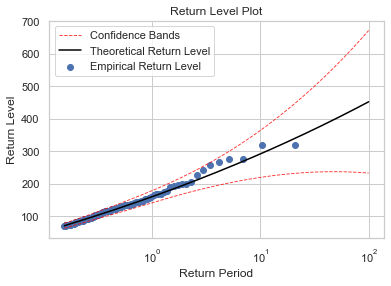

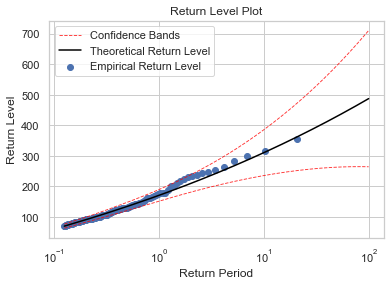

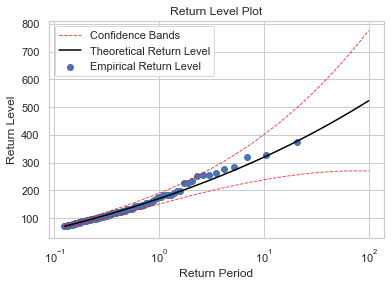

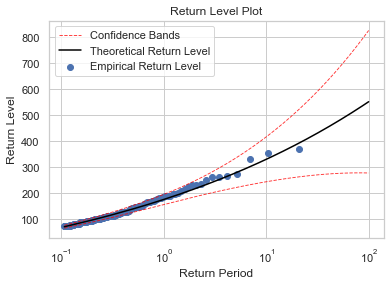

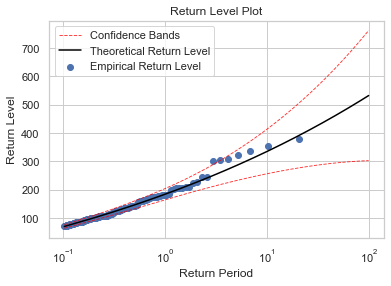

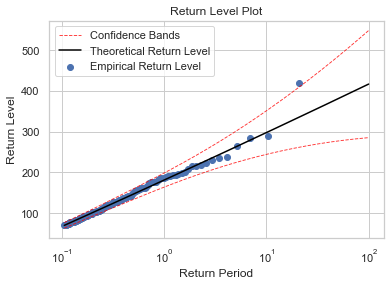

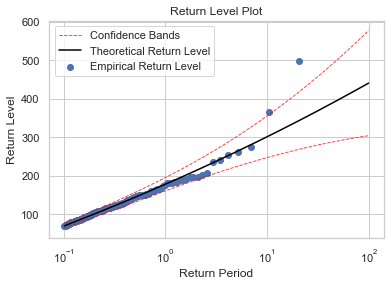

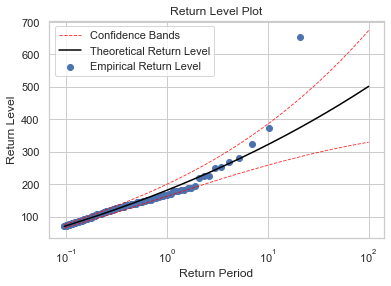

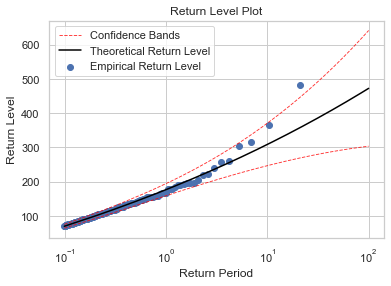

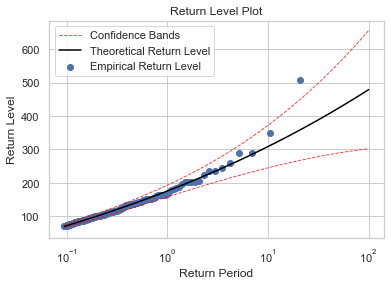

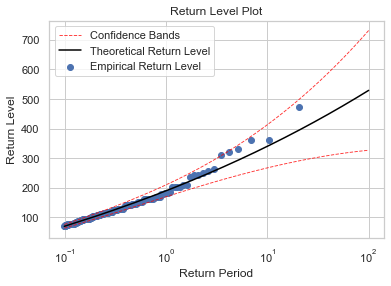

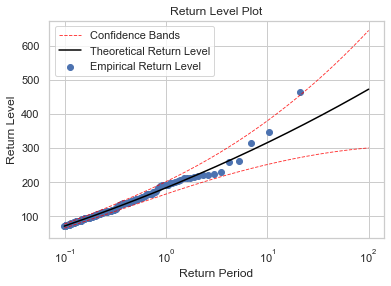

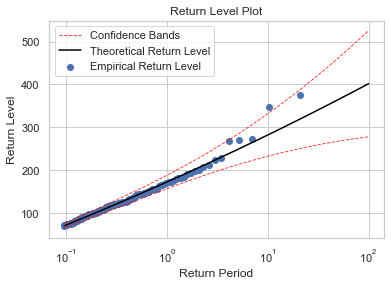

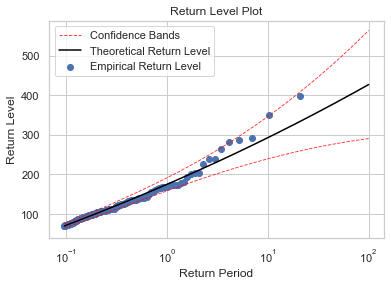

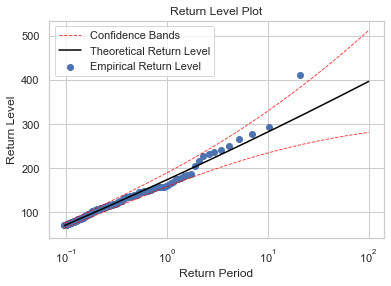

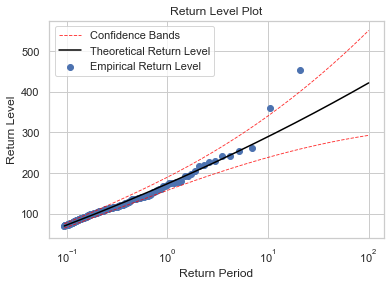

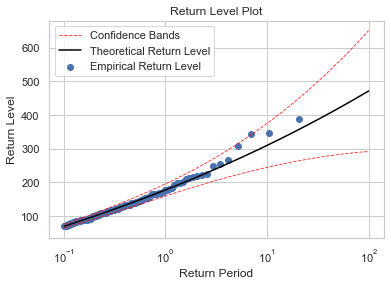

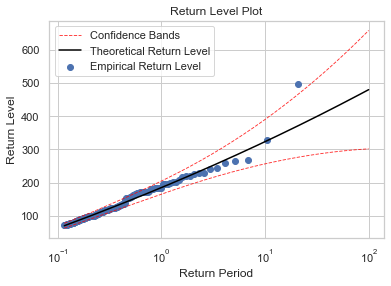

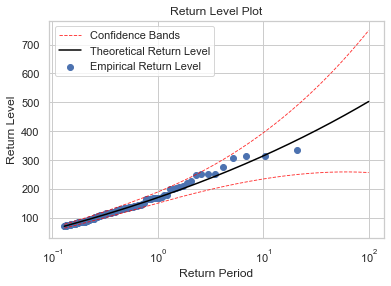

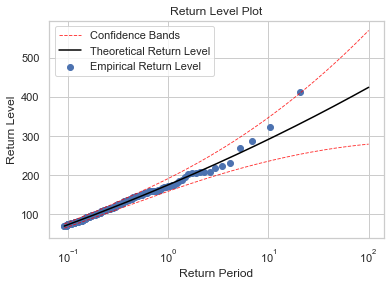

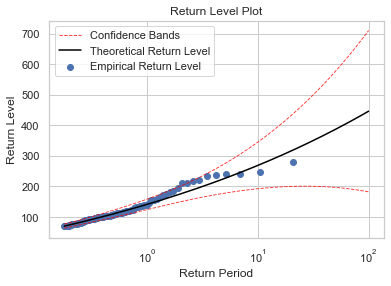

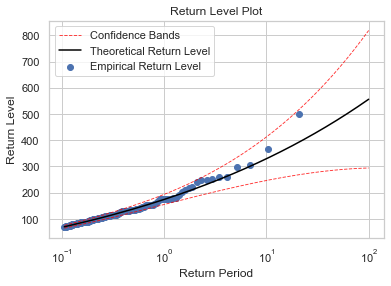

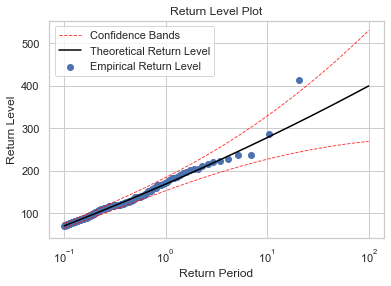

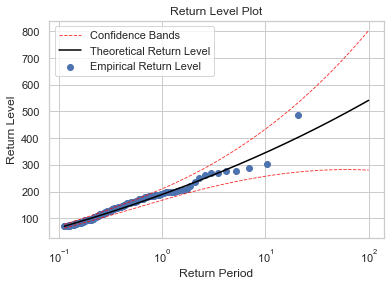

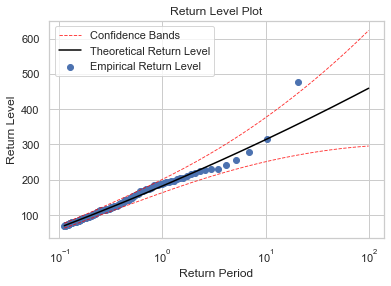

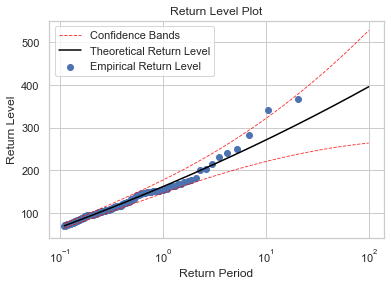

In [20]:
pareto_data_100=pareto_distribution_ev(r'CMIP\rainfall_data_total')
outputPath = os.path.join(r'CMIP', 'IMERG_100_year_return_level.csv')
pareto_data_100.to_csv(outputPath)

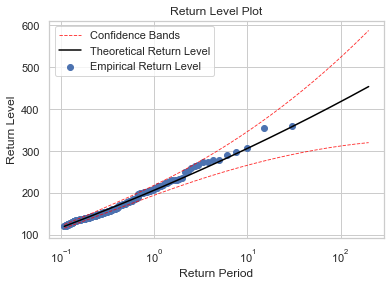

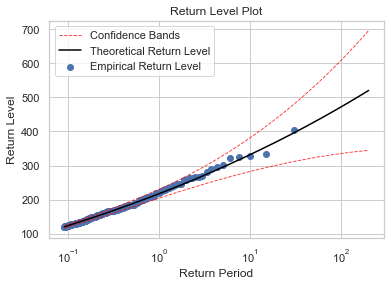

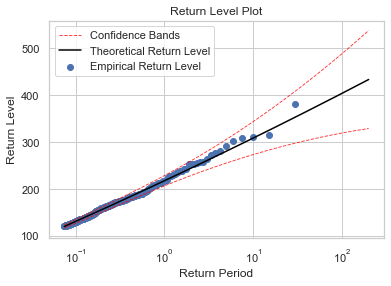

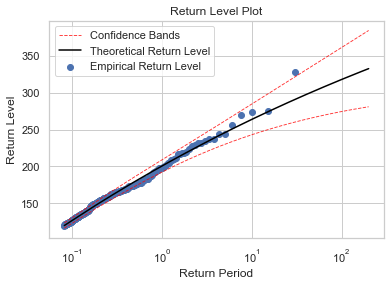

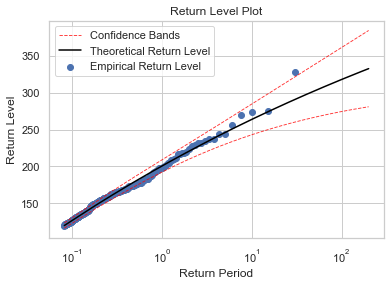

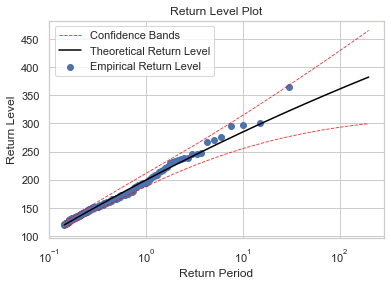

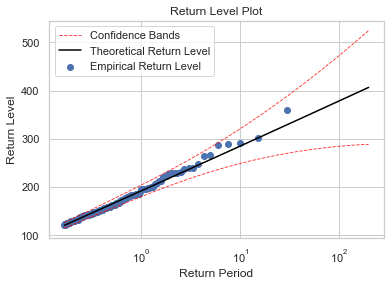

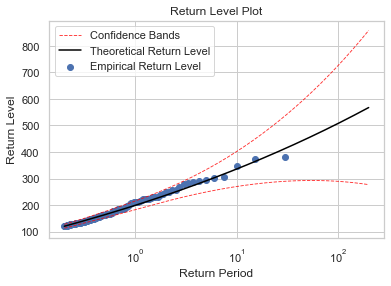

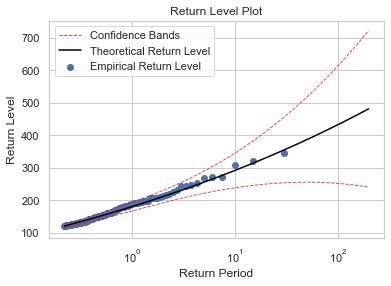

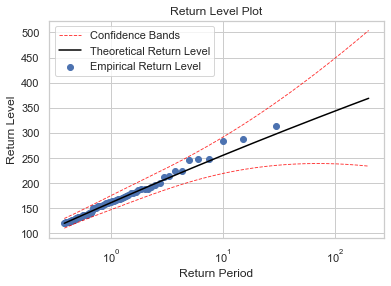

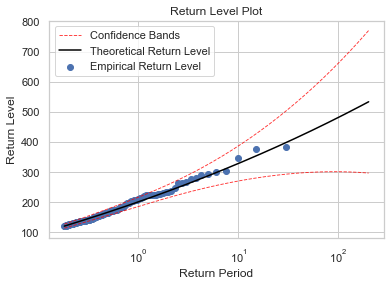

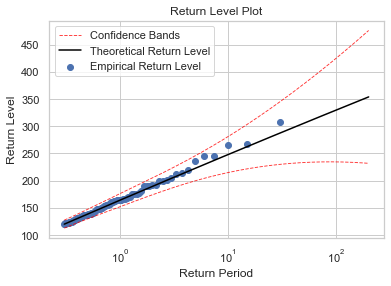

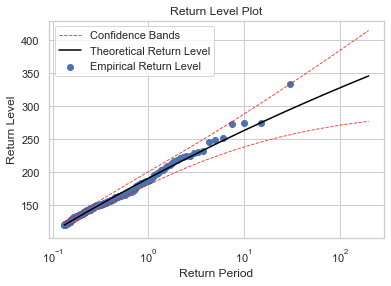

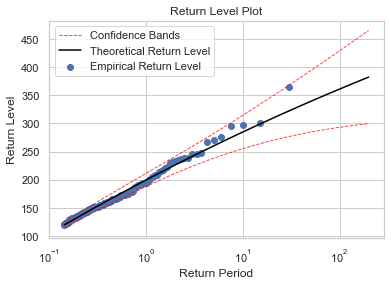

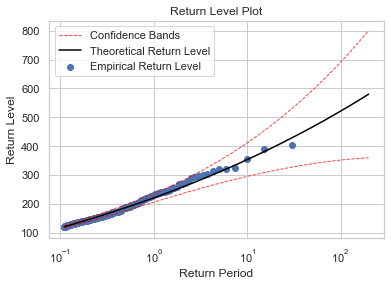

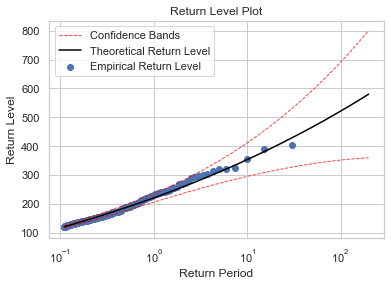

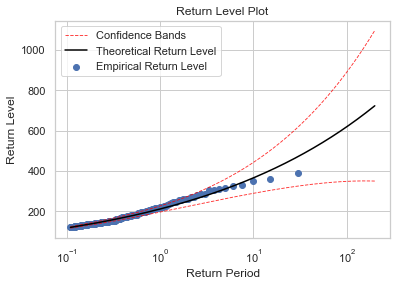

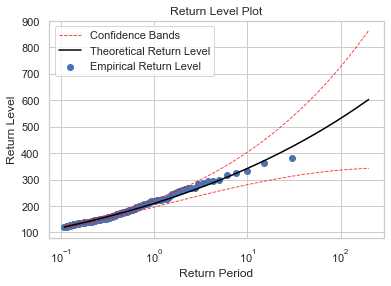

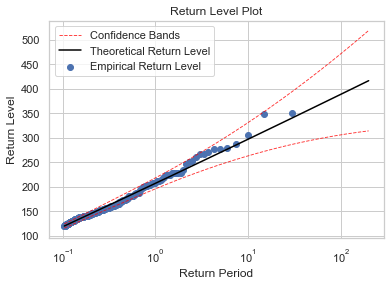

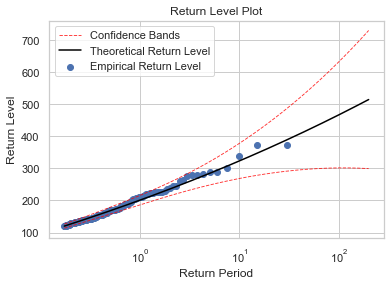

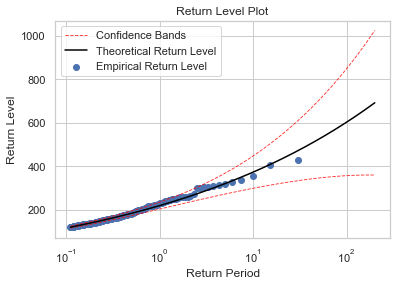

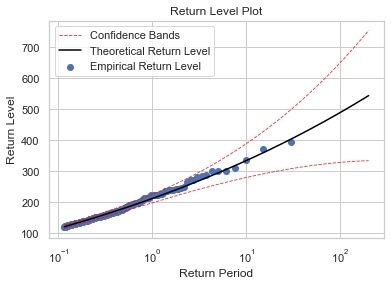

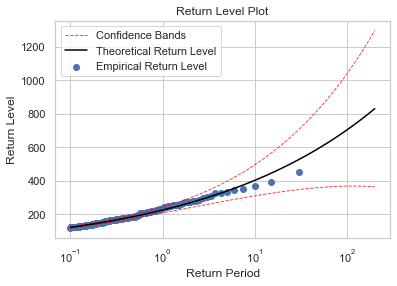

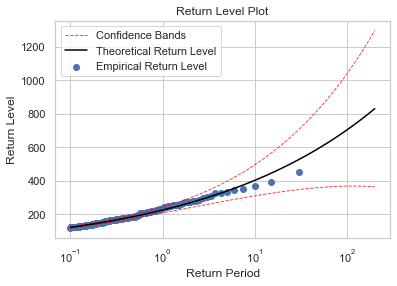

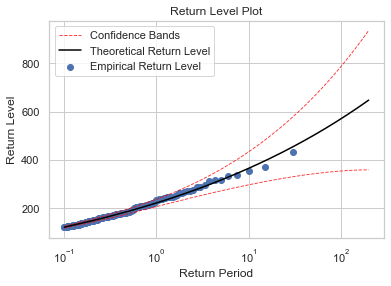

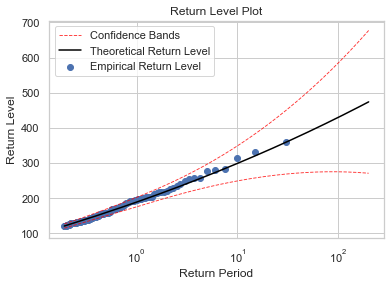

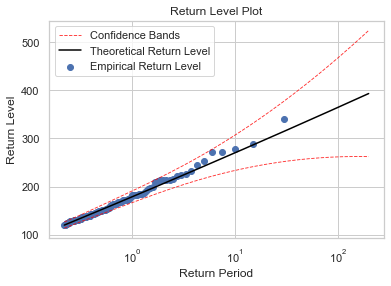

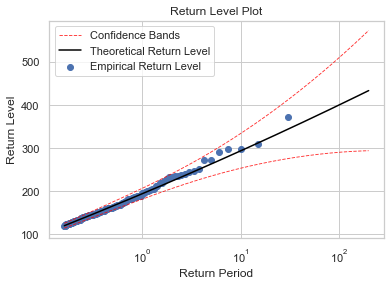

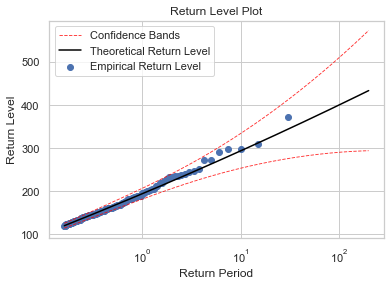

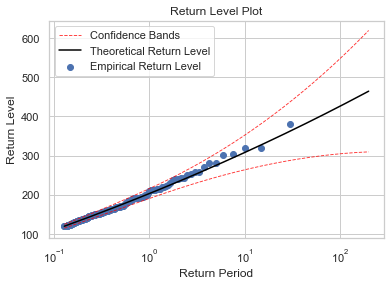

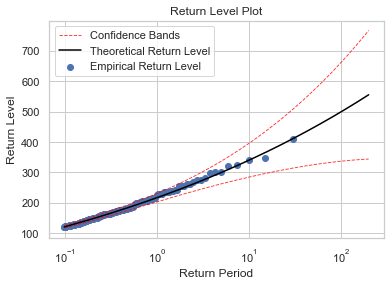

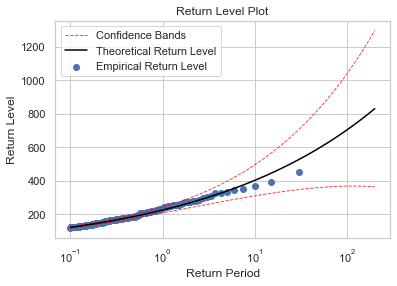

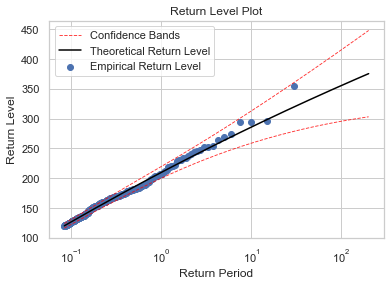

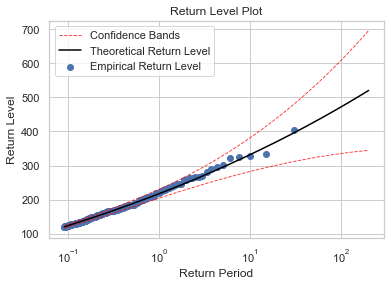

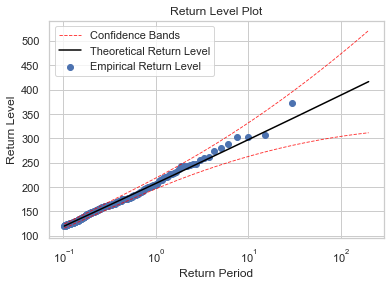

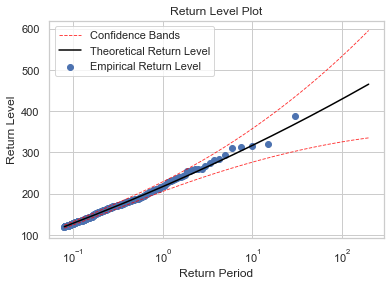

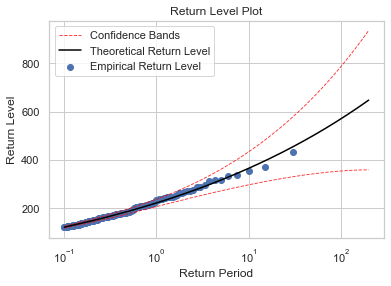

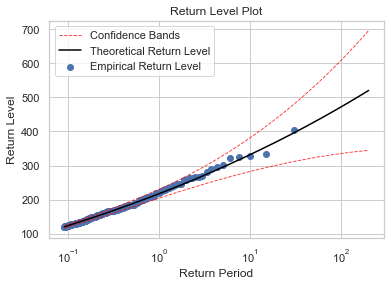

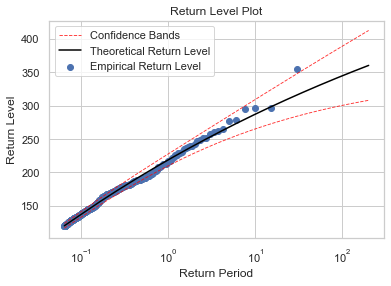

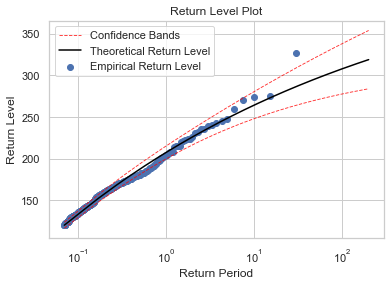

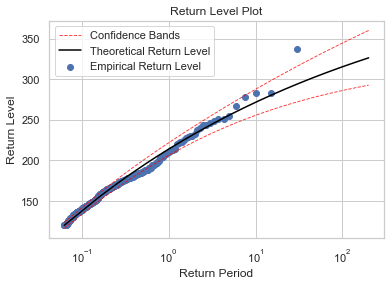

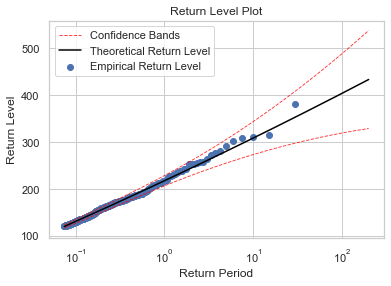

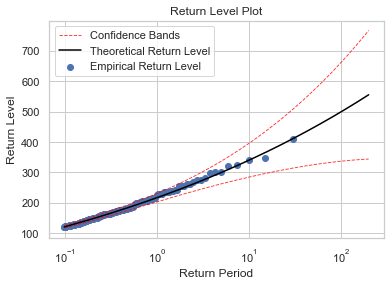

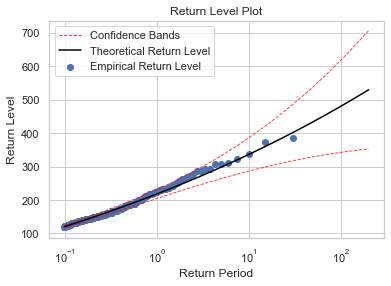

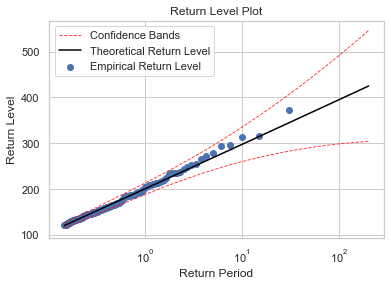

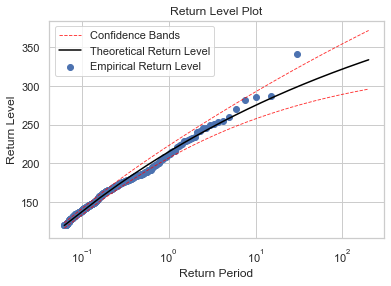

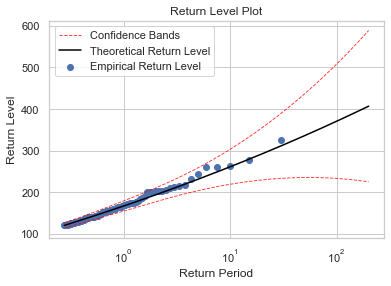

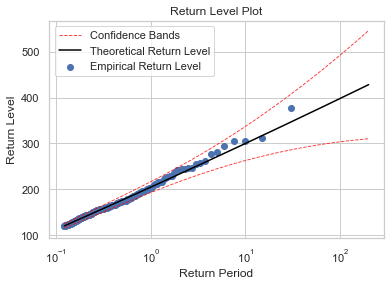

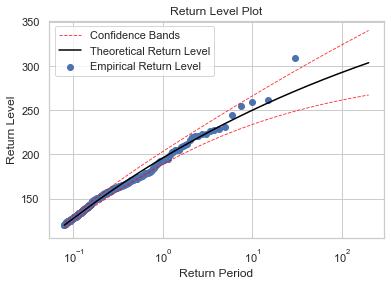

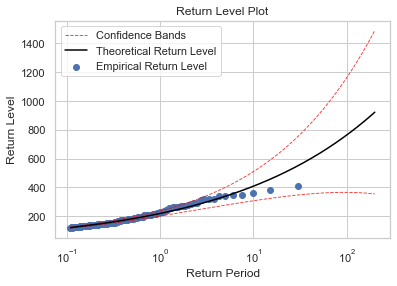

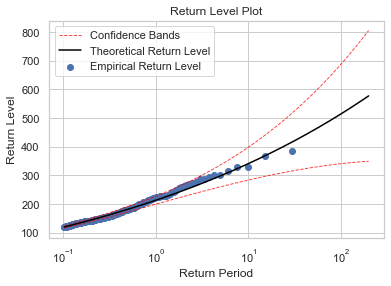

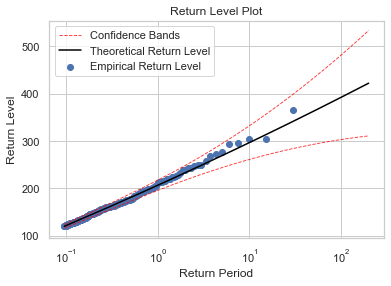

In [17]:
pareto_4_585=pareto_distribution_ev(r'CMIP\model_4_585_total')
outputPath = os.path.join(r'CMIP', 'CanESM5-ssp585_200_year_return_level.csv')
pareto_4_585.to_csv(outputPath)

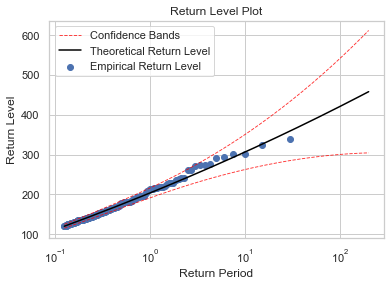

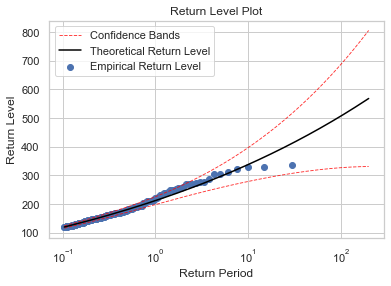

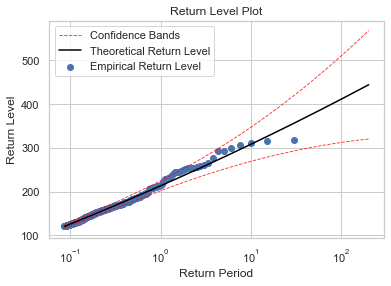

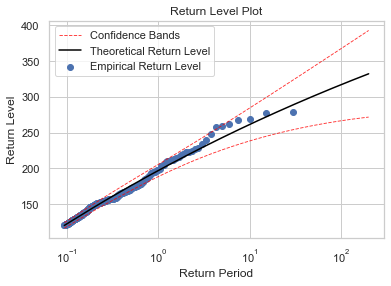

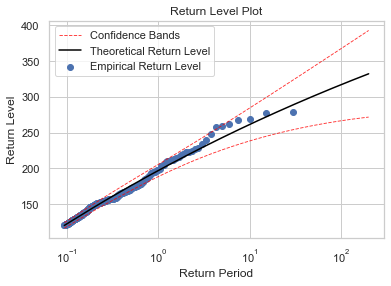

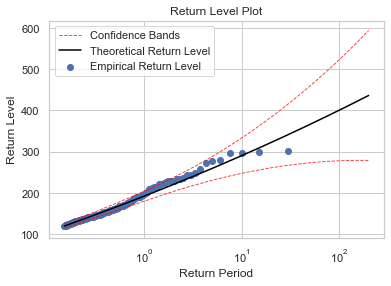

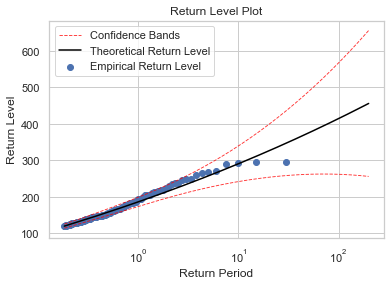

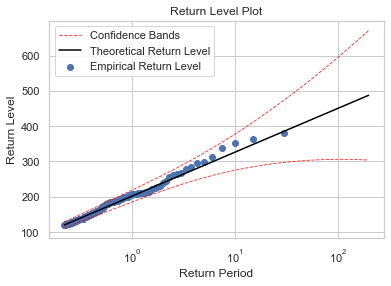

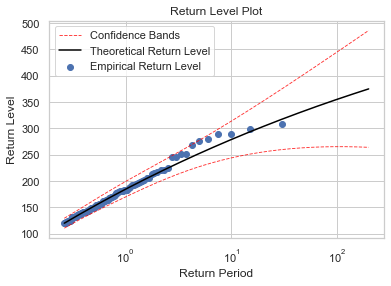

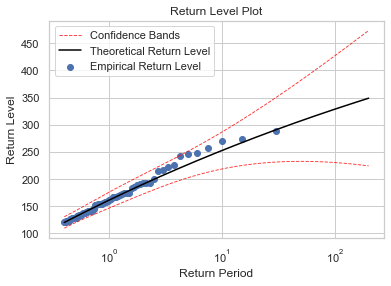

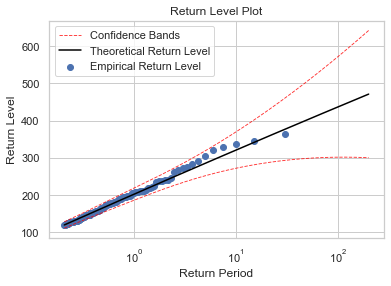

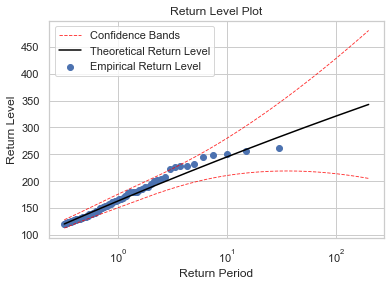

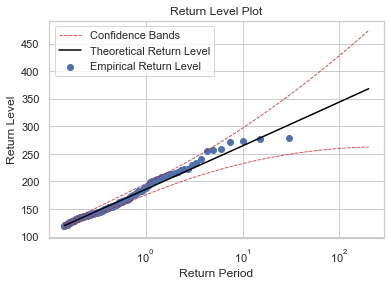

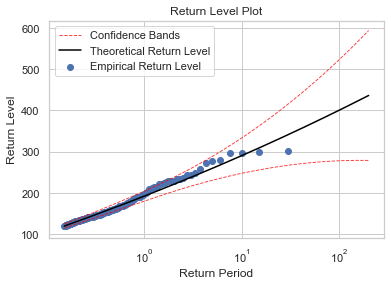

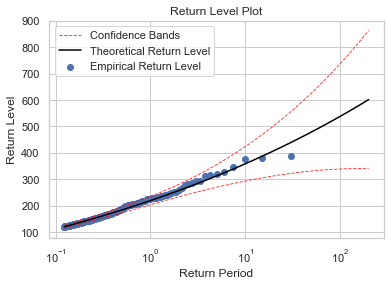

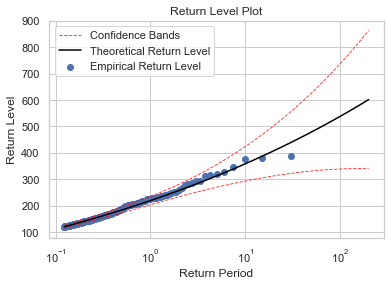

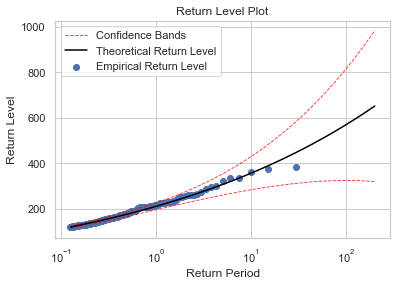

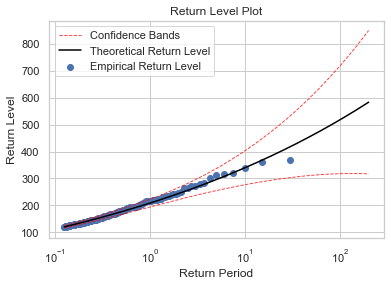

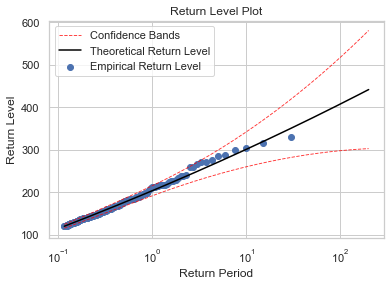

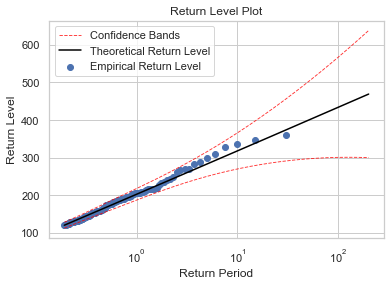

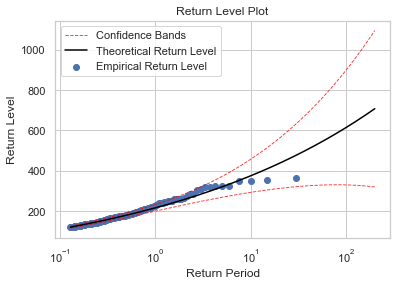

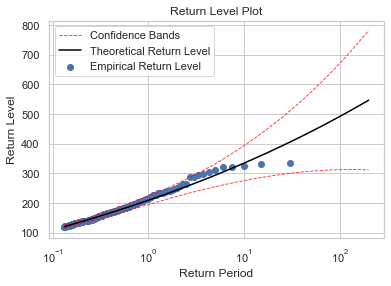

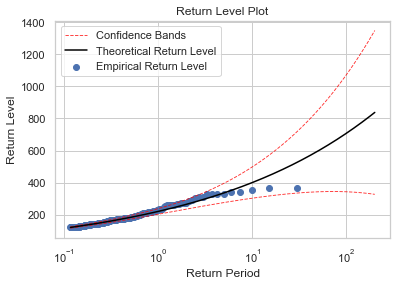

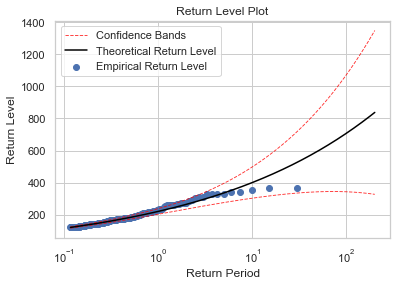

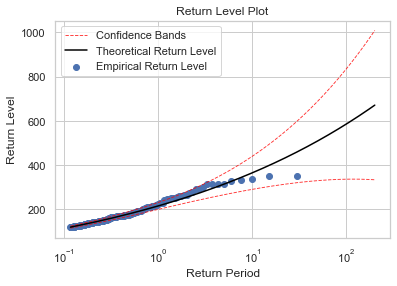

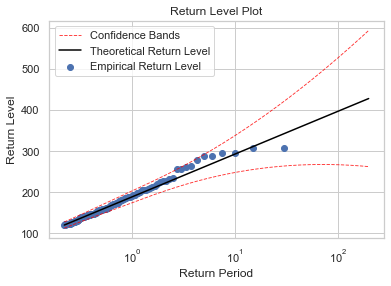

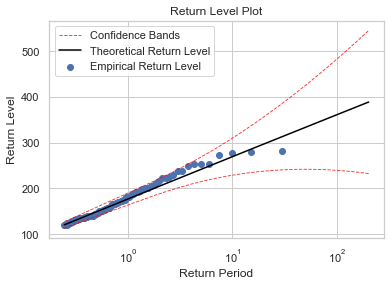

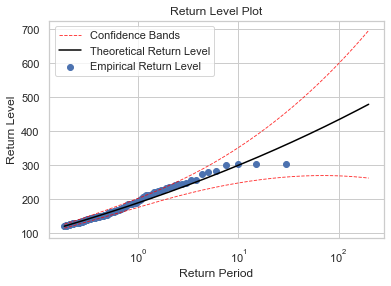

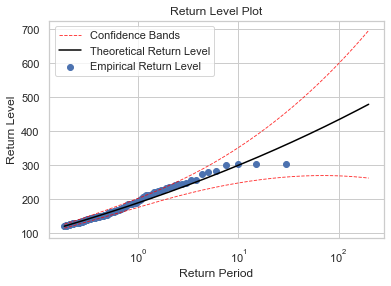

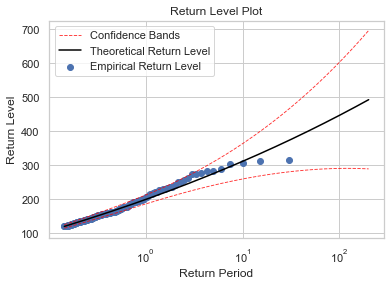

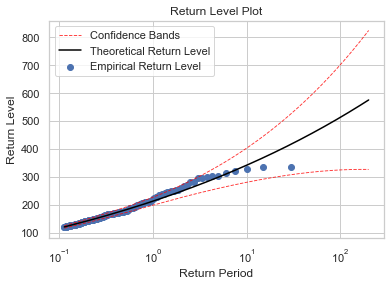

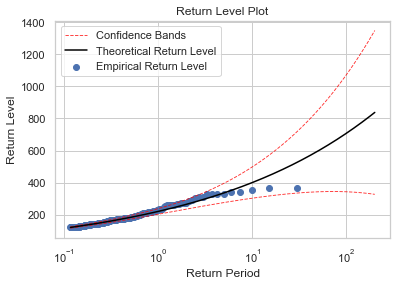

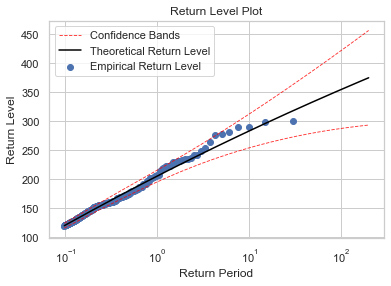

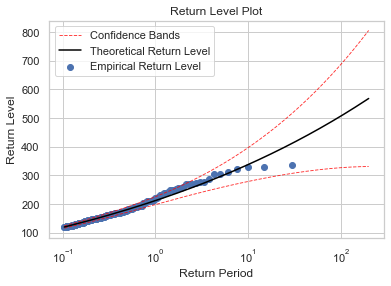

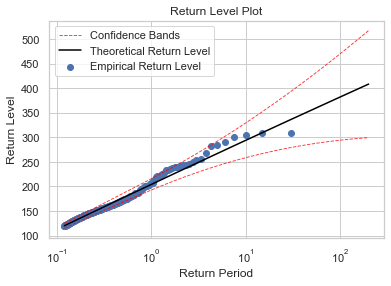

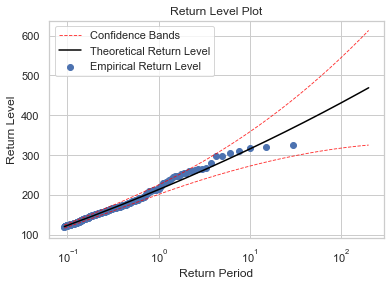

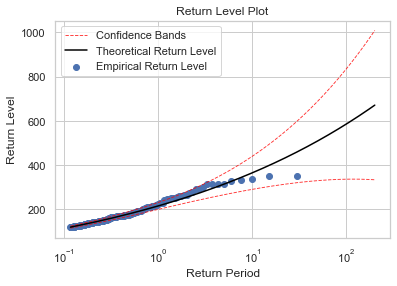

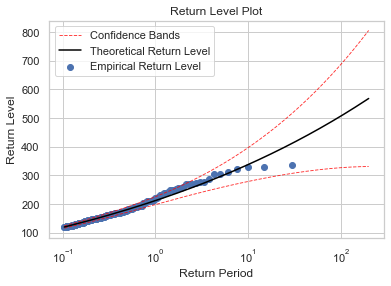

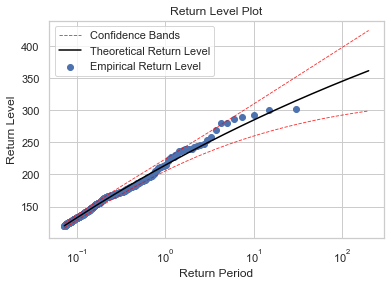

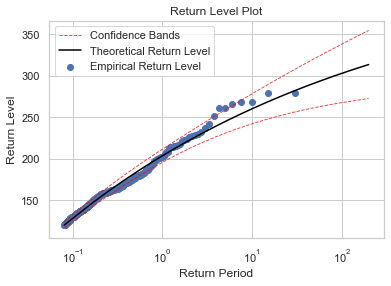

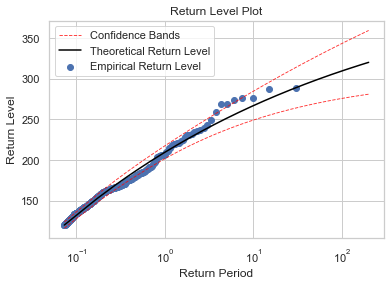

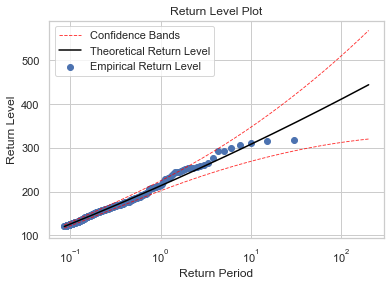

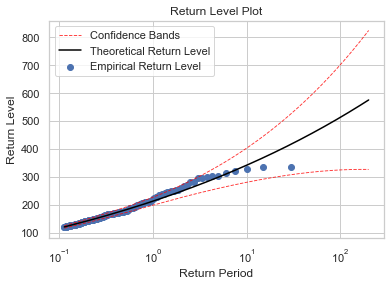

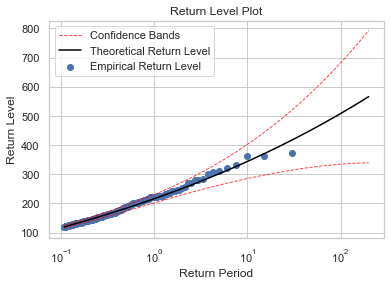

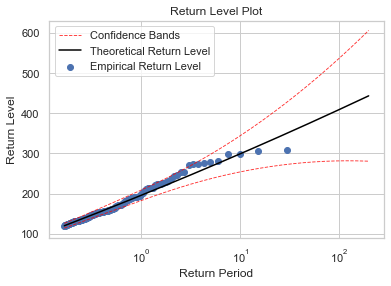

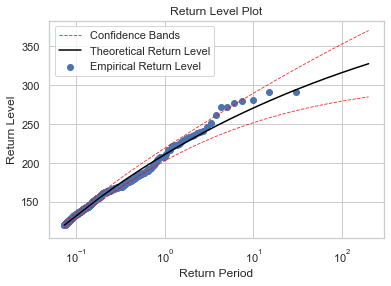

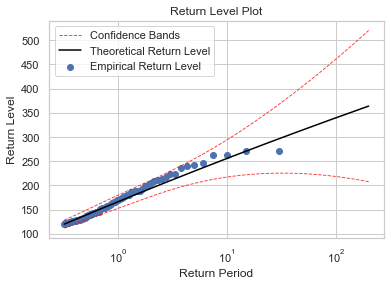

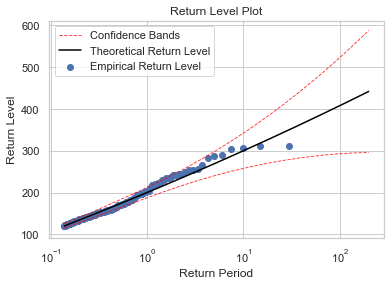

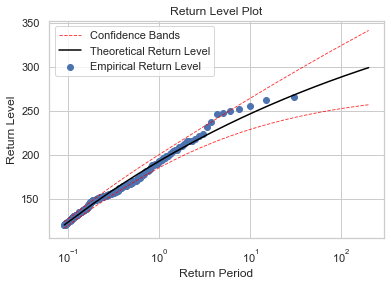

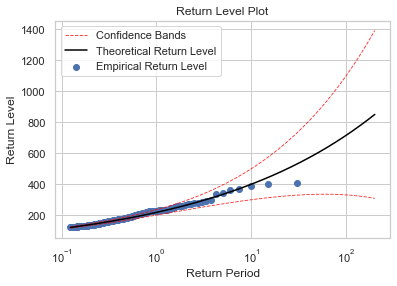

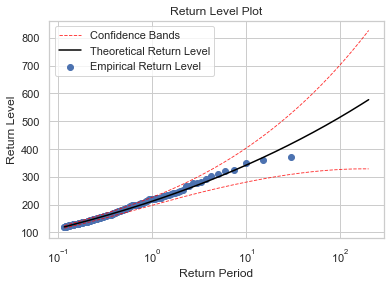

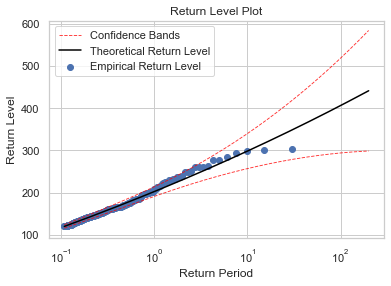

In [18]:
pareto_4_370=pareto_distribution_ev(r'CMIP\model_4_370_total')
outputPath = os.path.join(r'CMIP', 'CanESM5-ssp370_200_year_return_level.csv')
pareto_4_370.to_csv(outputPath)

In [19]:
pareto_4_370

200-year return level [2035-2065]
name                                                 
Subbasin-577   457.7085858300747 ± 153.55555021466978
Subbasin-401   568.2315122796185 ± 237.17804877697918
Subbasin-4    444.25903330596066 ± 124.11780679888918
Subbasin-10     332.2310560561152 ± 60.59684469022473
Subbasin-15     332.2310560561152 ± 60.59684469022473
Subbasin-28   436.40199423942397 ± 157.38806037087727
Subbasin-48    456.2373197974071 ± 199.98561196170726
Subbasin-52     487.5149257930291 ± 183.5878457303191
Subbasin-63     374.9209107816214 ± 110.8756476951667
Subbasin-7     348.7835247629607 ± 124.66280502394868
Subbasin-8       471.103568536266 ± 170.7447322161067
Subbasin-53   342.71003761063724 ± 137.83630182228535
Subbasin-37    368.1525786550867 ± 105.57258307963244
Subbasin-31   436.40199415243734 ± 157.38814380847842
Subbasin-24     601.7450017039251 ± 261.7635388946903
Subbasin-6      601.7450017039251 ± 261.7635388946903
Subbasin-18    651.8890611014813 ± 331.81697426763617
Subbasin-56     583.2398609513596 ± 266.3634933101444
Subbasin-59     441.6285633775451 ± 139.0170538397245
Subbasin-29    469.0394751432744 ± 169.19608163426963
Subbasin-60     707.610743539115 ± 387.93065906322545
Subbasin-25     546.6596816924182 ± 235.1981832602871
Subbasin-2      837.8188340815271 ± 511.1611829313351
Subbasin-3      837.8188340815271 ± 511.1611829313351
Subbasin-12      671.4473275798028 ± 337.327880576302
Subbasin-33    427.4699402411757 ± 165.46038922814785
Subbasin-41    388.6786837014594 ± 156.48035710921832
Subbasin-45   479.36507091429394 ± 217.50611572110589
Subbasin-13   479.36507091429394 ± 217.50611572110589
Subbasin-19     492.2130060733853 ± 203.2494210903261
Subbasin-30    574.8691614094165 ± 248.90118972406609
Subbasin-9      837.8188340815271 ± 511.1611829313351
Subbasin-54    374.76164527510144 ± 81.43944902615448
Subbasin-47    568.2315122796185 ± 237.17804877697918
Subbasin-49   408.51144462130065 ± 109.12299972087435
Subbasin-39   468.88391402573137 ± 143.98491346809882
Subbasin-14      671.4473275798028 ± 337.327880576302
Subbasin-50    568.2315122796185 ± 237.17804877697918
Subbasin-27    361.79807855420756 ± 62.78066118369232
Subbasin-55     313.49456972138375 ± 41.0900643985039
Subbasin-35    320.14274635454836 ± 39.18808938585382
Subbasin-23   444.25903322932413 ± 124.11767854012207
Subbasin-44    574.8691614094165 ± 248.90118972406609
Subbasin-42    565.9833138020526 ± 226.56711830584916
Subbasin-26   443.20994227976917 ± 162.60462604487432
Subbasin-17    327.6258579510443 ± 42.712254459964825
Subbasin-38    363.8350249473947 ± 156.19300206594494
Subbasin-21   441.90852478621855 ± 145.95482654738586
Subbasin-22     299.0790752334894 ± 42.26681416982477
Subbasin-5      850.5148754868459 ± 542.3824896999852
Subbasin-1     577.6670142277853 ± 248.92820221138595
MMR            441.0768682310859 ± 142.61194478550118

In [20]:
pareto_4_585

200-year return level [2035-2065]
name                                                 
Subbasin-577  453.75050079139226 ± 133.88874734182792
Subbasin-401    520.4955122507356 ± 176.0441646879743
Subbasin-4     433.2530388449298 ± 104.45545360695336
Subbasin-10    332.5801182634664 ± 51.671145974961725
Subbasin-15    332.5801182634664 ± 51.671145974961725
Subbasin-28     382.3538221947324 ± 82.68345625614965
Subbasin-48    406.6807782936788 ± 118.22611637182484
Subbasin-52     567.6568369643647 ± 290.7058531767152
Subbasin-63    480.7289195678456 ± 240.84881884246153
Subbasin-7     368.8171525716359 ± 134.99361990505295
Subbasin-8      533.0653017028633 ± 236.7398477120327
Subbasin-53   353.83753936683985 ± 122.06842449510843
Subbasin-37    346.07438024697944 ± 68.93269438410881
Subbasin-31    382.35382227040327 ± 82.68348277309296
Subbasin-24    580.0605135884823 ± 220.88320601347468
Subbasin-6     580.0605135884823 ± 220.88320601347468
Subbasin-18    722.5160775069075 ± 373.02836364071163
Subbasin-56      602.917313630741 ± 261.1128600850408
Subbasin-59    416.6629031349642 ± 102.47833667869281
Subbasin-29     514.3309252414995 ± 215.1625149788201
Subbasin-60    692.2385792842723 ± 332.40346340307417
Subbasin-25     544.0417617678926 ± 210.4600093289093
Subbasin-2     830.0849852053866 ± 466.98932995631236
Subbasin-3     830.0849852053866 ± 466.98932995631236
Subbasin-12     647.7342874730587 ± 289.3174879038766
Subbasin-33    473.74340525706964 ± 203.3575413735963
Subbasin-41   393.26549501723935 ± 131.01624467132845
Subbasin-45    433.3929321542544 ± 139.41568308320248
Subbasin-13    433.3929321542544 ± 139.41568308320248
Subbasin-19    464.4326527539925 ± 154.81009938525884
Subbasin-30    555.2039460628422 ± 211.68866707050208
Subbasin-9     830.0849852053866 ± 466.98932995631236
Subbasin-54     375.2815630039123 ± 72.38464207072796
Subbasin-47     520.4955122507356 ± 176.0441646879743
Subbasin-49   416.41265083954784 ± 104.92216817351175
Subbasin-39   465.61815812900346 ± 130.21624016033996
Subbasin-14     647.7342874730587 ± 289.3174879038766
Subbasin-50     520.4955122507356 ± 176.0441646879743
Subbasin-27    359.99783603410697 ± 52.24651661211444
Subbasin-55    318.95607642064766 ± 35.02576042677789
Subbasin-35    326.31076370833847 ± 33.69890381473012
Subbasin-23   433.25303884297307 ± 104.45536594492076
Subbasin-44    555.2039460628422 ± 211.68866707050208
Subbasin-42    529.6036190074275 ± 177.20458532697407
Subbasin-26     424.8457518243023 ± 121.1857780781701
Subbasin-17    333.95187600902364 ± 37.85177460316889
Subbasin-38   406.68331456510583 ± 181.90912138875024
Subbasin-21    428.04393664626144 ± 118.1057093866593
Subbasin-22     303.6767987040654 ± 36.48382343248278
Subbasin-5      921.5884207544116 ± 567.6686617735244
Subbasin-1      577.0293023647841 ± 227.9204941635977
MMR           421.80842512833317 ± 111.10913921815158

In [7]:
subbassins=52
model=[[] for _ in range(subbassins)]
for j in range(20,50): #2040-2060 (25,45)
    file=os.listdir(inputFolder)[j]
    for i in np.arange(0,subbassins): #(subbassins)
        file_path1=os.path.join(inputFolder, file)
        df1 = pd.read_csv(file_path1,index_col='name')
        model[i].append(df1.iloc[i,:].values.tolist())


In [8]:
flat_list=[[] for _ in range(subbassins)]
for i in range(52):
    flat_list[i] = [item for sublist in model[i] for item in sublist]
    

In [9]:
len(flat_list[1])

10950

In [10]:
max(flat_list[0])

360.25

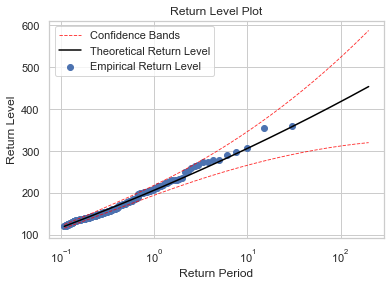

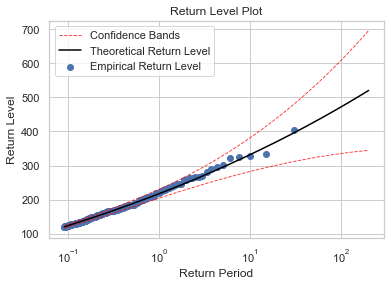

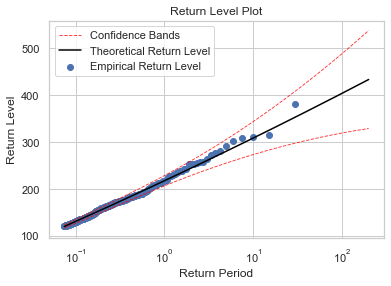

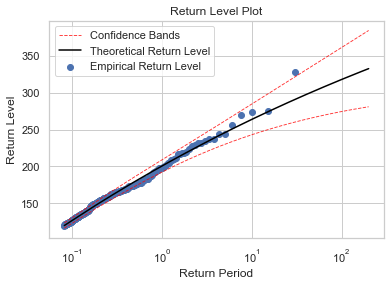

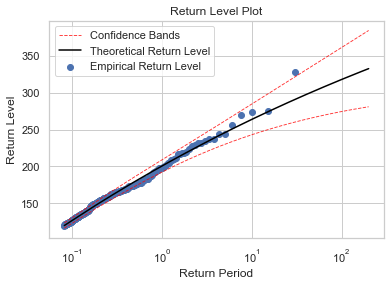

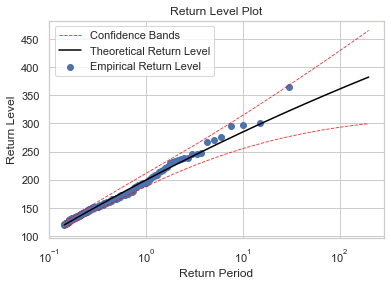

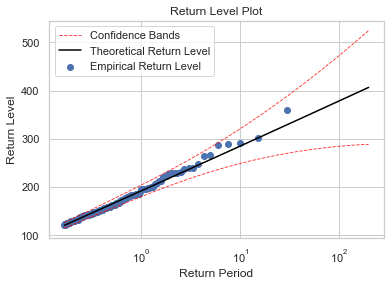

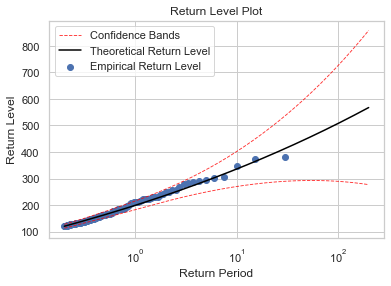

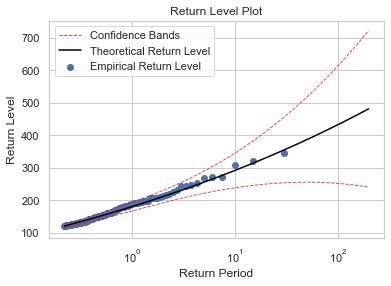

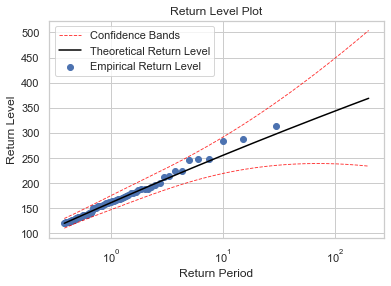

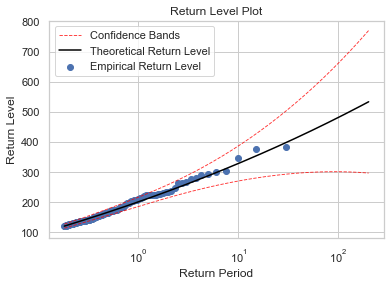

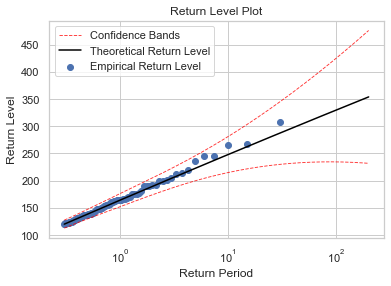

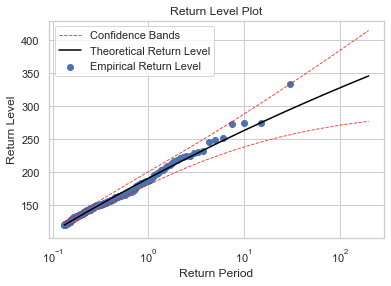

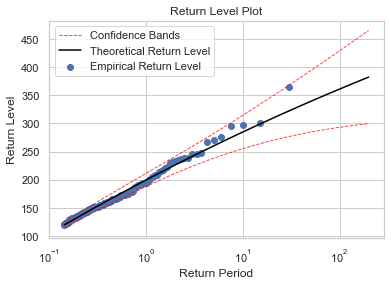

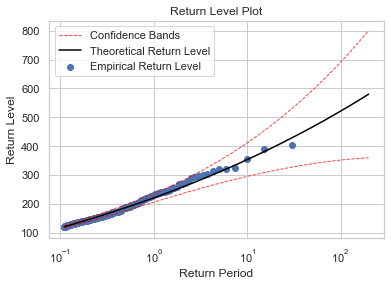

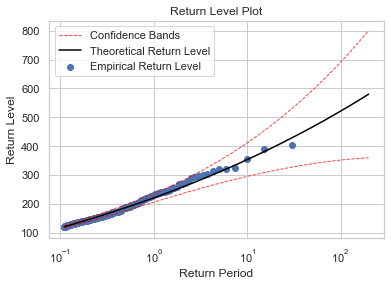

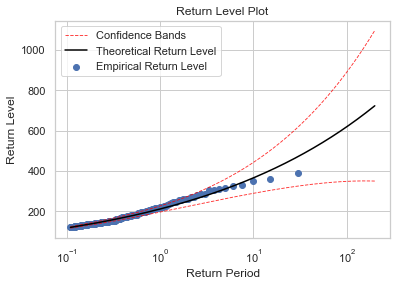

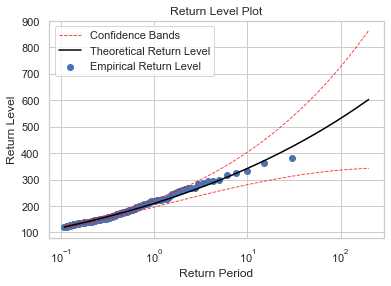

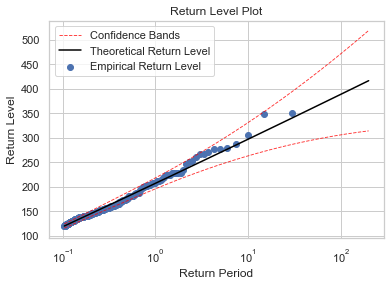

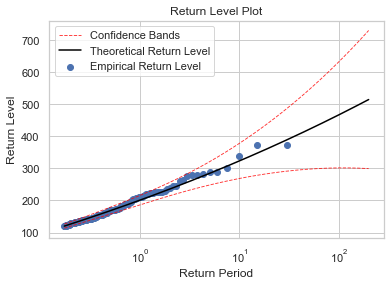

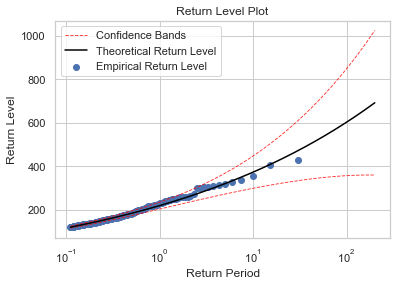

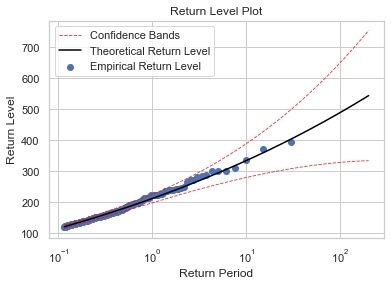

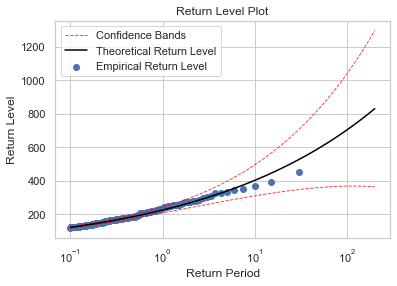

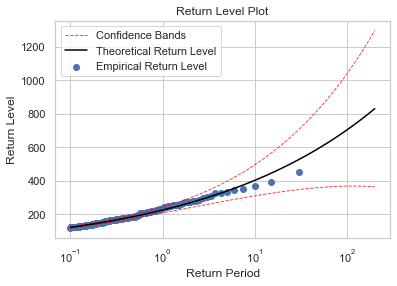

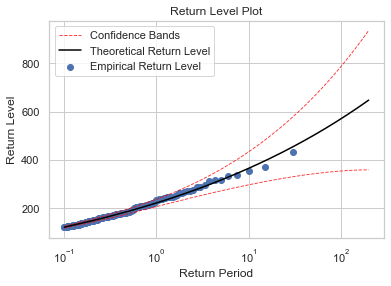

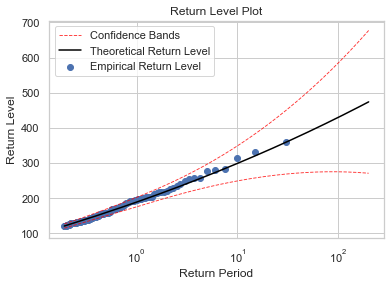

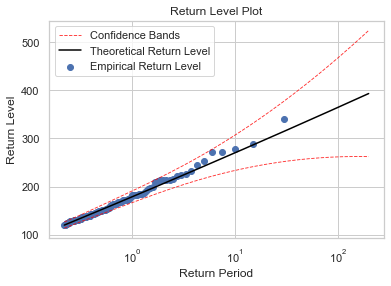

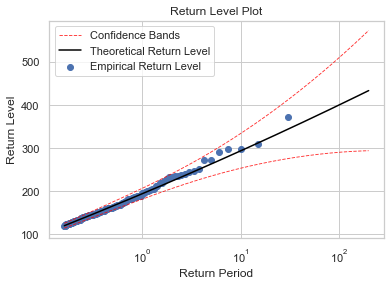

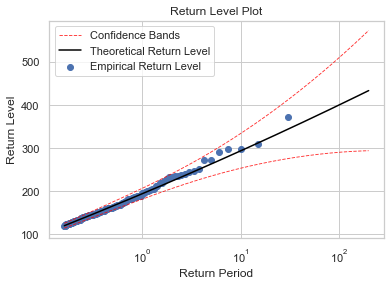

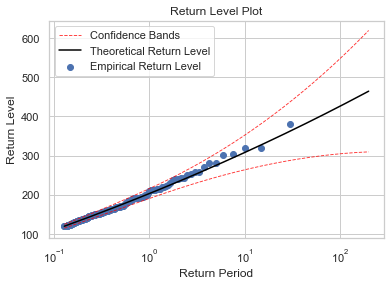

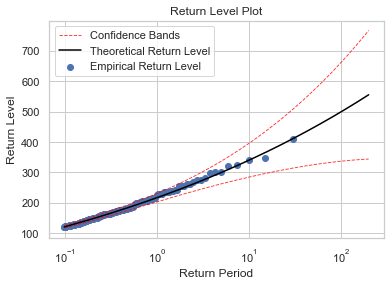

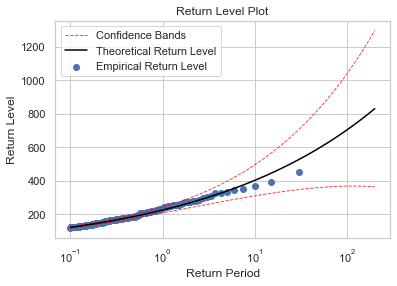

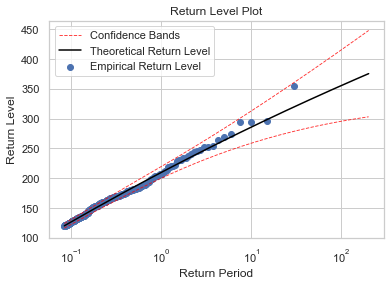

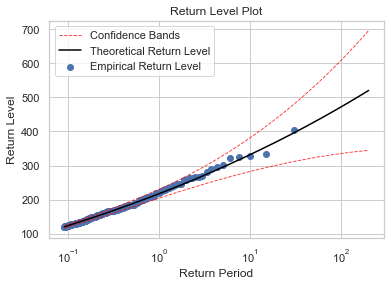

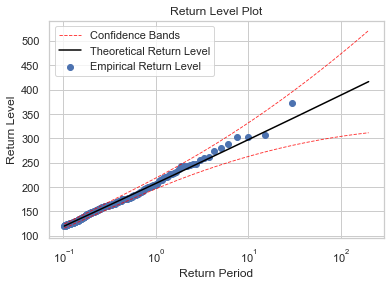

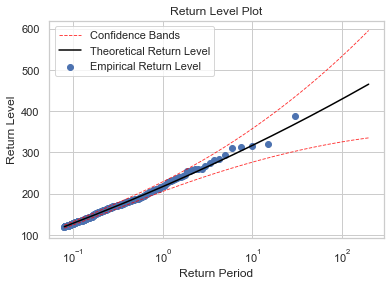

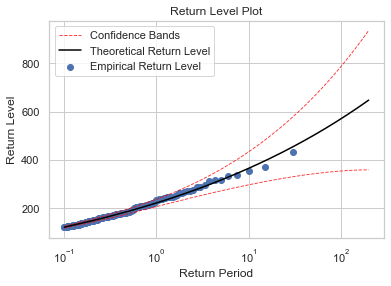

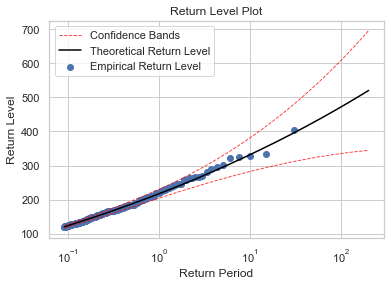

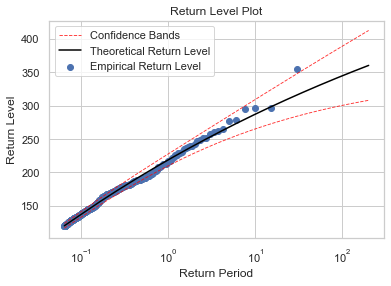

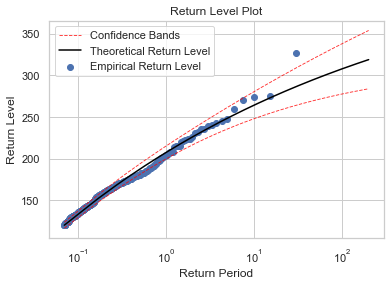

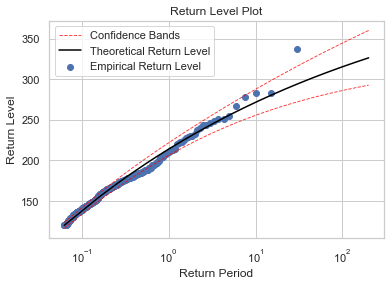

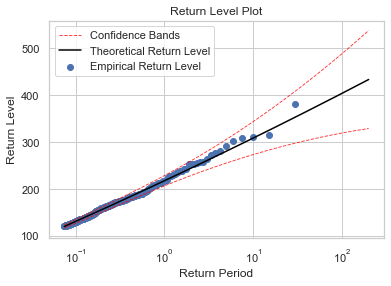

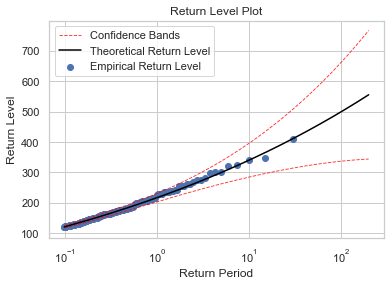

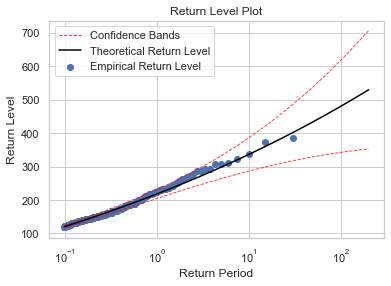

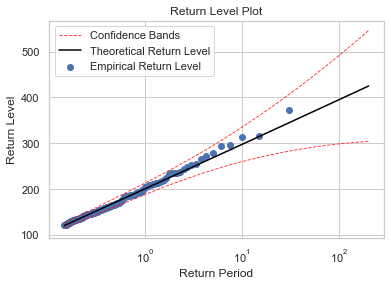

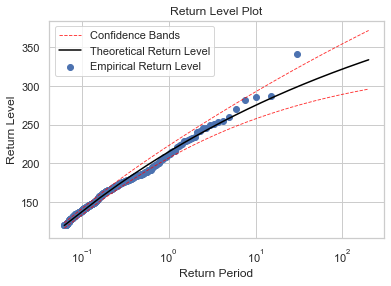

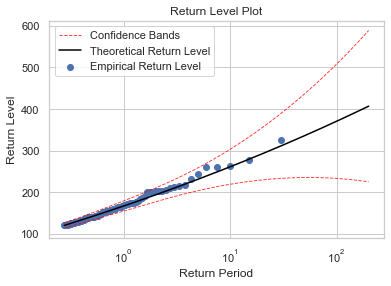

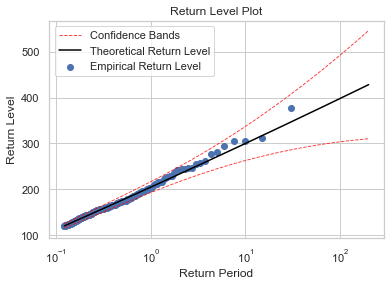

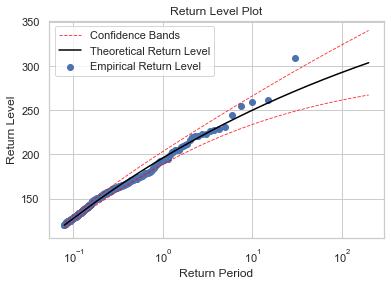

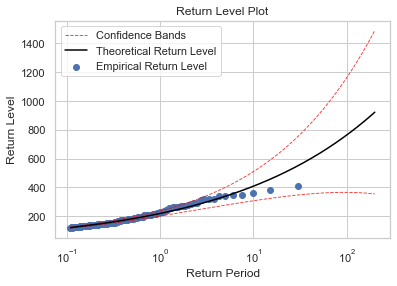

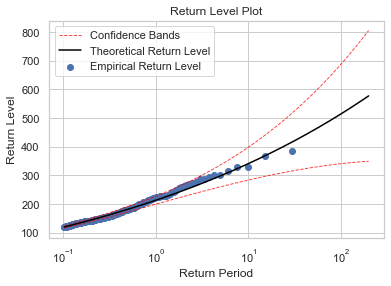

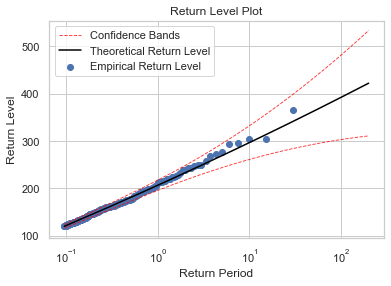

In [94]:
df_200_return_period=pd.DataFrame()
df_200_return_period.index=df1.index
df_200_return_period["200-year return level [2035-2065]"]=''
for i in range(52):
    data=flat_list[i]
    with Capturing() as output:
        thresh_modeling.return_value(data, 120, 0.05, 365, 73000, 'mle')
    a=output[0].split("is ")
    data2=a[1]
    df_200_return_period.iloc[i,0]=data2

In [95]:
df_200_return_period

200-year return level [2040-2060]
name                                                 
Subbasin-577  453.75050079139226 ± 133.88874734182792
Subbasin-401    520.4955122507356 ± 176.0441646879743
Subbasin-4     433.2530388449298 ± 104.45545360695336
Subbasin-10    332.5801182634664 ± 51.671145974961725
Subbasin-15    332.5801182634664 ± 51.671145974961725
Subbasin-28     382.3538221947324 ± 82.68345625614965
Subbasin-48    406.6807782936788 ± 118.22611637182484
Subbasin-52     567.6568369643647 ± 290.7058531767152
Subbasin-63    480.7289195678456 ± 240.84881884246153
Subbasin-7     368.8171525716359 ± 134.99361990505295
Subbasin-8      533.0653017028633 ± 236.7398477120327
Subbasin-53   353.83753936683985 ± 122.06842449510843
Subbasin-37    346.07438024697944 ± 68.93269438410881
Subbasin-31    382.35382227040327 ± 82.68348277309296
Subbasin-24    580.0605135884823 ± 220.88320601347468
Subbasin-6     580.0605135884823 ± 220.88320601347468
Subbasin-18    722.5160775069075 ± 373.02836364071163
Subbasin-56      602.917313630741 ± 261.1128600850408
Subbasin-59    416.6629031349642 ± 102.47833667869281
Subbasin-29     514.3309252414995 ± 215.1625149788201
Subbasin-60    692.2385792842723 ± 332.40346340307417
Subbasin-25     544.0417617678926 ± 210.4600093289093
Subbasin-2     830.0849852053866 ± 466.98932995631236
Subbasin-3     830.0849852053866 ± 466.98932995631236
Subbasin-12     647.7342874730587 ± 289.3174879038766
Subbasin-33    473.74340525706964 ± 203.3575413735963
Subbasin-41   393.26549501723935 ± 131.01624467132845
Subbasin-45    433.3929321542544 ± 139.41568308320248
Subbasin-13    433.3929321542544 ± 139.41568308320248
Subbasin-19    464.4326527539925 ± 154.81009938525884
Subbasin-30    555.2039460628422 ± 211.68866707050208
Subbasin-9     830.0849852053866 ± 466.98932995631236
Subbasin-54     375.2815630039123 ± 72.38464207072796
Subbasin-47     520.4955122507356 ± 176.0441646879743
Subbasin-49   416.41265083954784 ± 104.92216817351175
Subbasin-39   465.61815812900346 ± 130.21624016033996
Subbasin-14     647.7342874730587 ± 289.3174879038766
Subbasin-50     520.4955122507356 ± 176.0441646879743
Subbasin-27    359.99783603410697 ± 52.24651661211444
Subbasin-55    318.95607642064766 ± 35.02576042677789
Subbasin-35    326.31076370833847 ± 33.69890381473012
Subbasin-23   433.25303884297307 ± 104.45536594492076
Subbasin-44    555.2039460628422 ± 211.68866707050208
Subbasin-42    529.6036190074275 ± 177.20458532697407
Subbasin-26     424.8457518243023 ± 121.1857780781701
Subbasin-17    333.95187600902364 ± 37.85177460316889
Subbasin-38   406.68331456510583 ± 181.90912138875024
Subbasin-21    428.04393664626144 ± 118.1057093866593
Subbasin-22     303.6767987040654 ± 36.48382343248278
Subbasin-5      921.5884207544116 ± 567.6686617735244
Subbasin-1      577.0293023647841 ± 227.9204941635977
MMR           421.80842512833317 ± 111.10913921815158

In [53]:
data=flat_list

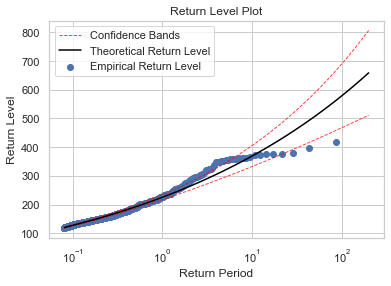

In [73]:
with Capturing() as output:
    thresh_modeling.return_value(data, 120, 0.05, 365, 73000, 'mle')

In [88]:
a=output[0].split("is ")
a[1]

'520.4955122507356 ± 176.0441646879743'

In [55]:
thresh_modeling.MRL?

Signature: thresh_modeling.MRL(sample, alpha)
Docstring: <no docstring>
File:      c:\users\quint\anaconda3\envs\gds\lib\site-packages\thresholdmodeling\thresh_modeling.py
Type:      function


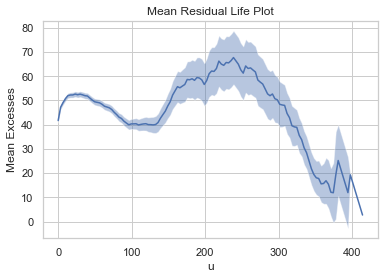

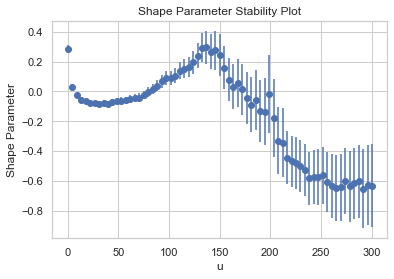

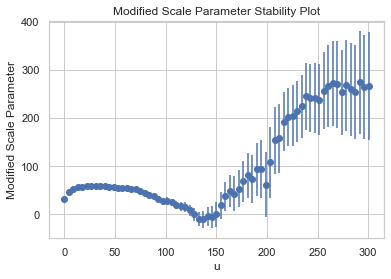

In [57]:
thresh_modeling.MRL(data, 0.05)   
thresh_modeling.Parameter_Stability_plot(data, 0.05)

In [65]:
thresh_modeling.gpdfit(data, 100, 'mle')

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





(0.08896027072921775,
 36.860799293740975,
 array([  0.  ,   0.  ,   0.  , ..., 378.07, 395.68, 416.98]),
 [0.01999999999999602,
  0.04999999999999716,
  0.06999999999999318,
  0.06999999999999318,
  0.0799999999999983,
  0.09000000000000341,
  0.12000000000000455,
  0.12000000000000455,
  0.15000000000000568,
  0.1700000000000017,
  0.18999999999999773,
  0.20000000000000284,
  0.25,
  0.2600000000000051,
  0.2600000000000051,
  0.3100000000000023,
  0.3400000000000034,
  0.3400000000000034,
  0.35999999999999943,
  0.37999999999999545,
  0.39000000000000057,
  0.4000000000000057,
  0.4099999999999966,
  0.4300000000000068,
  0.5,
  0.5100000000000051,
  0.519999999999996,
  0.5999999999999943,
  0.6200000000000045,
  0.6599999999999966,
  0.6599999999999966,
  0.6700000000000017,
  0.7000000000000028,
  0.7199999999999989,
  0.7199999999999989,
  0.75,
  0.75,
  0.7999999999999972,
  0.8400000000000034,
  0.8599999999999994,
  0.8700000000000045,
  0.8799999999999955,
  0.89000000000

Estimator: moments 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.60573   0.09559  



Standard Error Type: 



Standard Errors

 scale   shape  

1.3686  0.0286  



Asymptotic Variance Covariance

       scale      shape    

scale   1.872958  -0.028071

shape  -0.028071   0.000818



Correlation

       scale    shape  

scale   1.0000  -0.7171

shape  -0.7171   1.0000



Optimization Information

  Convergence: NA 

  Function Evaluations: NA 





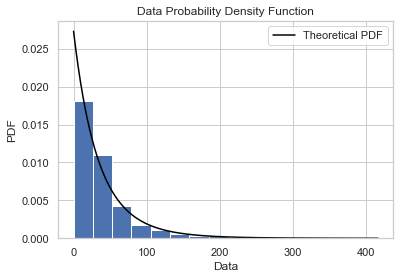

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





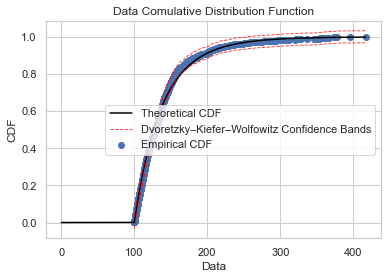

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





C:\Users\Quint\anaconda3\envs\gds\lib\site-packages\thresholdmodeling\thresh_modeling.py:194: RuntimeWarning: invalid value encountered in double_scalars
  CI_qq_high.append(threshold + ((scale/shape)*(((1-((F2)/(1)))**-shape) - 1)))
C:\Users\Quint\anaconda3\envs\gds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


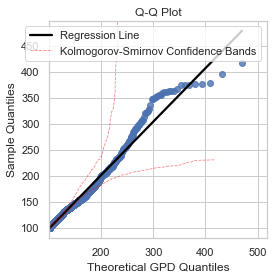

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





C:\Users\Quint\anaconda3\envs\gds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


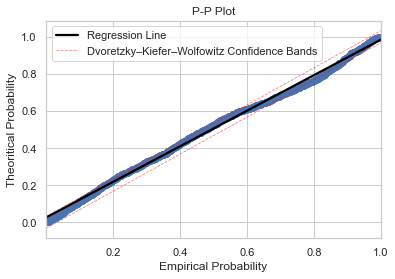

In [62]:
thresh_modeling.gpdpdf(data, 100, 'moments', 'sturges', 0.05)
thresh_modeling.gpdcdf(data, 100, 'mle', 0.05)
thresh_modeling.qqplot(data,100, 'mle', 0.05)
thresh_modeling.ppplot(data, 100, 'mle', 0.05)

The return value for the given return period is 658.7426109607213 ± 147.56263268529395


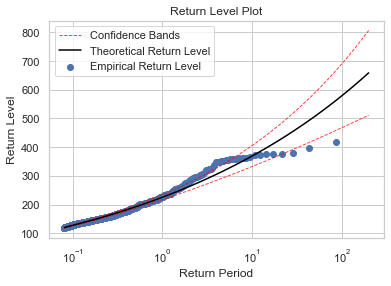

In [64]:
thresh_modeling.return_value(data, 120, 0.05, 365, 73000, 'mle')

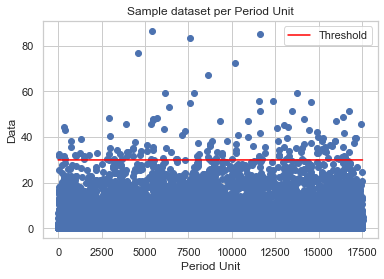

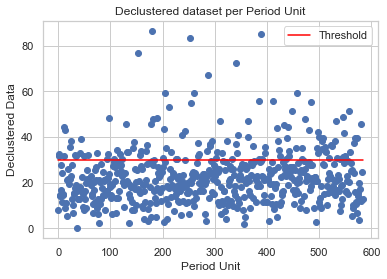

In [7]:
thresh_modeling.decluster(data, 30, 30)